In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
def count_method(url):
    data = pd.read_csv(url,low_memory=False,usecols=['enstation_time','exstation_time'])
    data['enstation_time'] = pd.to_datetime(data['enstation_time'])
    data['exstation_time'] = pd.to_datetime(data['exstation_time'],format='mixed')
    data = data[~data['exstation_time'].isna()]
    data = data[data['enstation_time'] != data['exstation_time']]
    data['duration'] = ((data['exstation_time'] - data['enstation_time']).dt.seconds) / 60
    data['duration_round'] = np.round(data['duration'])
#     duration = data['duration'].value_counts()
#     duration_round = data['duration_round'].value_counts()
#     duration_round = pd.DataFrame(duration_round).sort_values('duration_round')
#     duration = pd.DataFrame(duration).sort_values('duration')
    data = data[['duration','duration_round']].reset_index(drop=True)
    return data

In [3]:
TC_data = count_method('0402TC-data下车时间五.csv')
UTC_data_CatBoost = count_method('0402CatBoost下车时间五.csv')
UTC_data_XGBoost = count_method('0402XG下车时间五.csv')
UTC_data_RF = count_method('0402RF下车时间五.csv')
UTC_data_SVM = count_method('D:/Code/YYH/1014小论文/0314补充实验/0227SVM下车时间.csv')

In [4]:
TC_data

,duration,duration_round
0,49.533333,50.0
1,11.016667,11.0
2,18.466667,18.0
3,83.350000,83.0
4,21.716667,22.0
...,...,...
5280517,53.550000,54.0
5280518,43.683333,44.0
5280519,25.966667,26.0
5280520,10.083333,10.0


In [10]:
out = pd.DataFrame({'TC-data':TC_data['duration'],
                   'UTC-data-CatBoost':UTC_data_CatBoost['duration'],
                   'UTC-data-XGBoost':UTC_data_XGBoost['duration'],
                   'UTC-data-RF':UTC_data_RF['duration'],})

In [11]:
out

,TC-data,UTC-data-CatBoost,UTC-data-XGBoost,UTC-data-RF
0,49.533333,8.683333,34.583333,29.616667
1,11.016667,4.766667,11.900000,3.950000
2,18.466667,21.550000,5.216667,5.433333
3,83.350000,4.066667,21.783333,5.300000
4,21.716667,22.300000,17.666667,3.683333
...,...,...,...,...
8194091,NaN,NaN,NaN,11.633333
8194092,NaN,NaN,NaN,6.983333
8194093,NaN,NaN,NaN,6.833333
8194094,NaN,NaN,NaN,6.700000


In [12]:
out[['TC-data','UTC-data-CatBoost']].dropna()

,TC-data,UTC-data-CatBoost
0,49.533333,8.683333
1,11.016667,4.766667
2,18.466667,21.550000
3,83.350000,4.066667
4,21.716667,22.300000
...,...,...
5280517,53.550000,9.833333
5280518,43.683333,16.600000
5280519,25.966667,7.033333
5280520,10.083333,9.816667


In [13]:
np.log(out)

,TC-data,UTC-data-CatBoost,UTC-data-XGBoost,UTC-data-RF
0,3.902646,2.161405,3.543372,3.388337
1,2.399409,1.561647,2.476538,1.373716
2,2.915967,3.070376,1.651859,1.692553
3,4.423049,1.402824,3.081145,1.667707
4,3.078080,3.104587,2.871680,1.303818
...,...,...,...,...
8194091,NaN,NaN,NaN,2.453875
8194092,NaN,NaN,NaN,1.943526
8194093,NaN,NaN,NaN,1.921813
8194094,NaN,NaN,NaN,1.902108


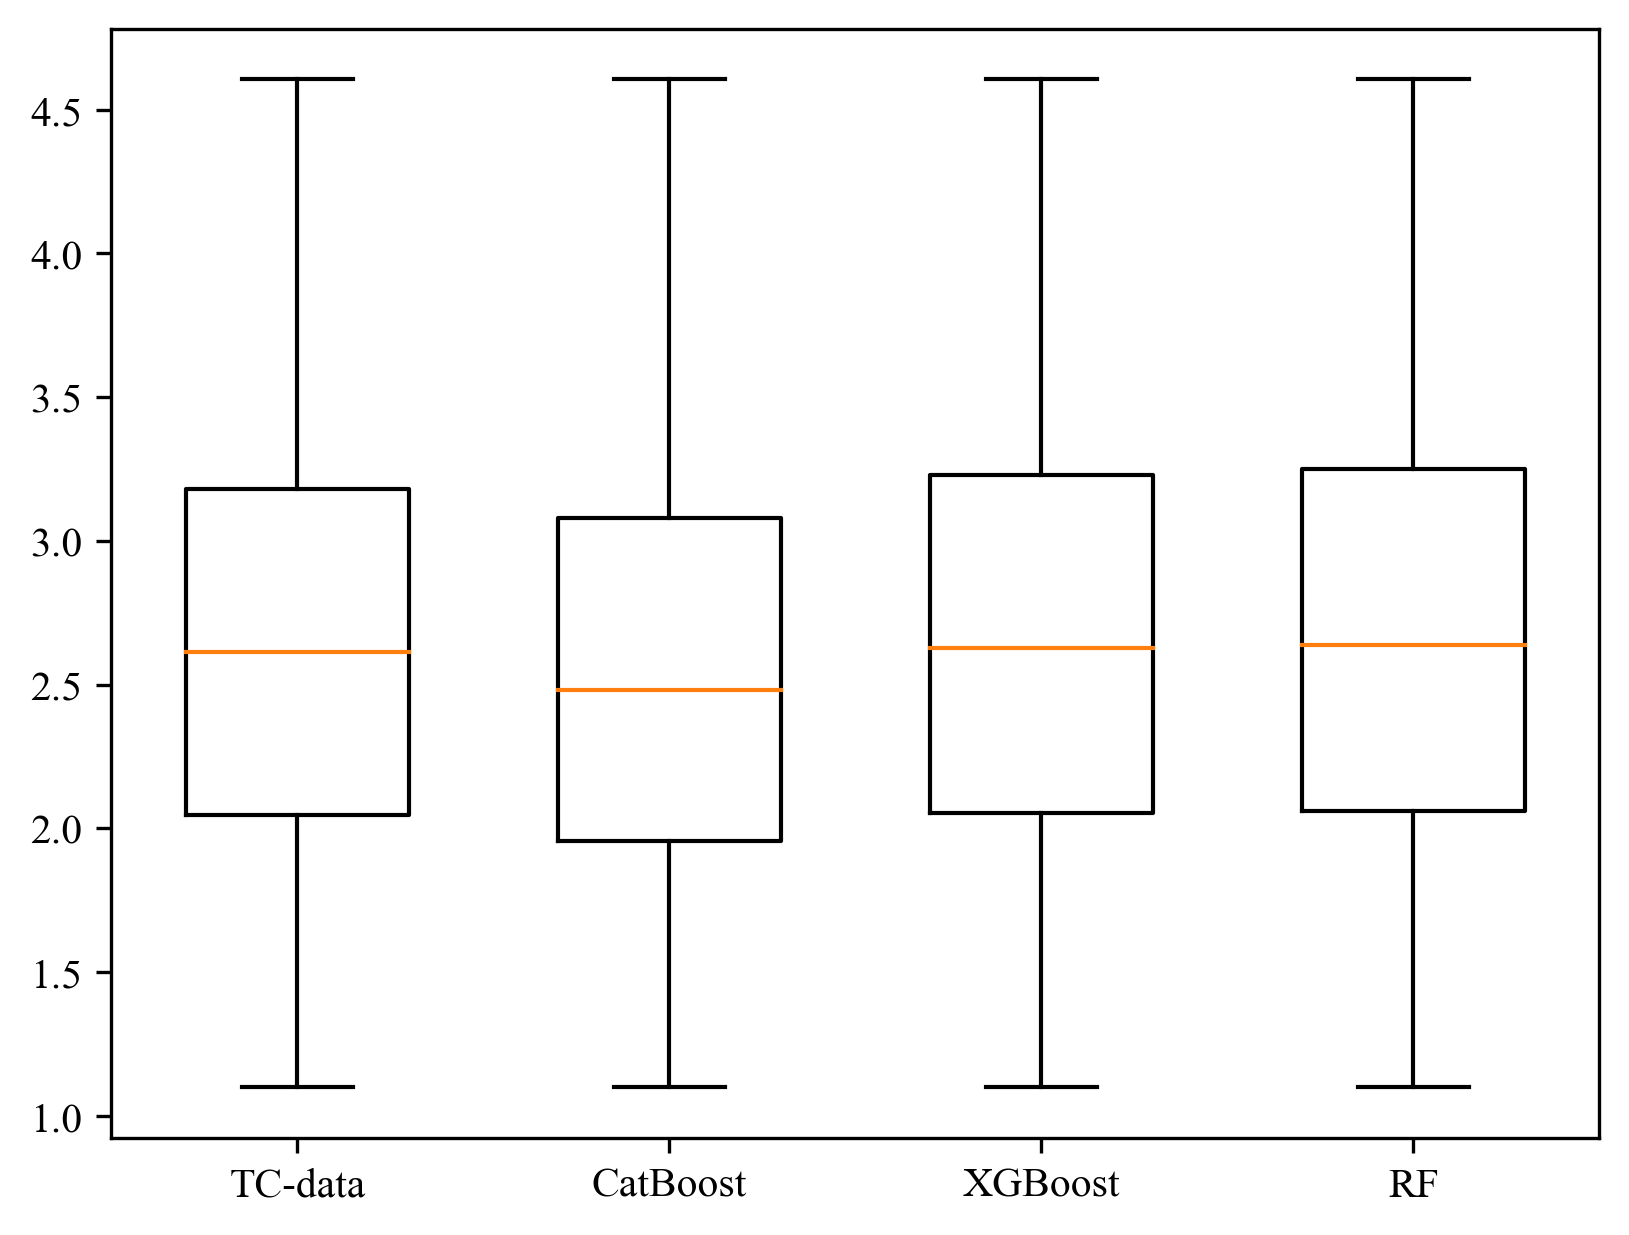

In [14]:
plt.figure(dpi=300)
plt.boxplot(np.log(out.dropna()).to_numpy(), positions=[1, 2, 3, 4], widths=0.6)  # positions控制x轴位置
plt.xticks([1, 2, 3, 4], labels=['TC-data','CatBoost','XGBoost','RF'])  # 设置分组标签
plt.show()